In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits #load_digits is a dataset and there are more examples of the same

In [8]:
digits = load_digits()

In [9]:
dir(digits) #displaying the contents of the dataset
#we're going to use 'data' and 'target' to train dand test our model
#the images can be displayed using matshow()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
digits.data[0] #this displays the first element of the data
#it is an 8x8 image represented by a one dimensional array as shown below
#the image is in form of pixels where the brightest is assigned number 255 and the darkest region is 0
#scaling (dividing the entire set by 255) is done sometimes #in different tutorial

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

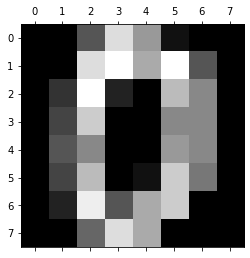

In [11]:
plt.gray()
plt.matshow(digits.images[0]) #to display the image

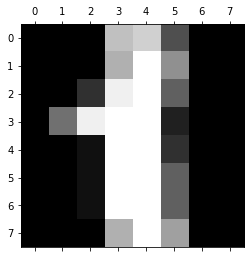

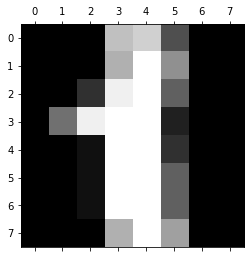

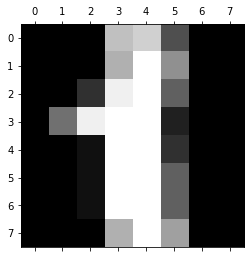

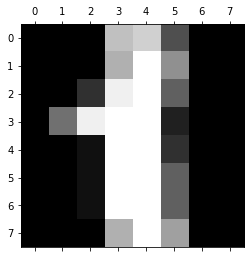

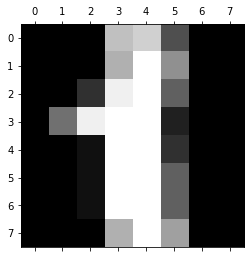

In [12]:
for i in range(5):
    plt.matshow(digits.images[1]) #to print multiple images we can use a for loop

In [13]:
digits.target[0:5] #here were printing the values for the images from 0-5

array([0, 1, 2, 3, 4])

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2) #we divide our dataset to training and testing samples
#we split the data because the data used to train the model should be different from the data used to test the model to avoid biasness
#test_size- specifies the size/amount/percentage of data to be used for testing the model
#train_size- specifies the percentage of data to be used for training the model

In [18]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #to create a logistic regression object

In [22]:
model.fit(X_train, y_train)

c:\users\folio\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.score(X_test, y_test)

0.9666666666666667

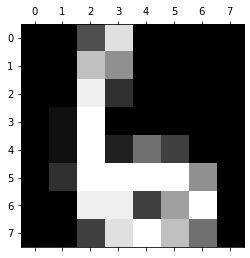

In [24]:
plt.matshow(digits.images[67])

In [25]:
model.predict([digits.data[67]])

array([6])

In [27]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [28]:
y_predicted = model.predict(X_test) #gets all the predicted values for X_test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted) #y_test is the truth and y_predicted is what your model predicted
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 43,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  2,  1,  0,  1,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

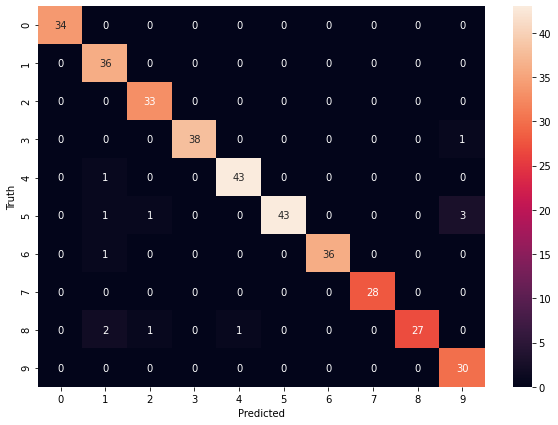

In [33]:
#to visualize the data above we use seaborn module to create a confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')